**Імпортуємо необхідні бібліотеки:**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
import joblib

# 1. Завантажуємо дані, ознайомлюємся з їх структурою і характеристиками

Файли

**train.csv** - тренувальний набір даних; `Exited` є бінарною цільовою змінною

**test.csv** - тестовий набір даних; наша мета — передбачити ймовірність `Exited`

In [2]:
start_test_df = pd.read_csv('test.csv') # завантажуємо тестовий набір даних
start_test_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09


In [3]:
start_train_df = pd.read_csv('train.csv') # завантажуємо трейновий набір даних
start_train_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


Із завантажених файлів бачимо, що наші набори даних містять як числові, так і категоріальні дані

**Перевіремо якість даних на предмет відсутніх даних, а також перевіряємо типи даних у стовпцях**

In [4]:
start_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1015.8+ KB


In [5]:
start_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


Бачимо, що в наших трейнових і тестових даних немає пропущених значень

Оскільки подальшу роботу ми будемо вести використовучи `id` клієнта, то колонку `Surname` і `CustomerId` видалимо як зайві і ту, що не несут інформаційного навантаження

In [6]:
columns_to_drop = ['Surname', 'CustomerId']

start_test_df = start_test_df.drop(columns_to_drop, axis=1)
start_train_df = start_train_df.drop(columns_to_drop, axis=1)

Бачимо, що `id` має числовий формат, а це є не логічно і не оптимально з точки зору розміру даних.
Змінимо тип даних в колонці на `str`

In [7]:
start_train_df['id'] = start_train_df['id'].astype("str")
start_test_df['id'] = start_test_df['id'].astype("str")

# 2. Готуємо трейнову, валідаційну і тестові вибірки для подальшої роботи

Оскільки для роботи нам надані дві вибірки: трейнова і тестова; то наша задача розділити трейнову вибірку на трейнову і валідоційну. Ділити будемо у співвідношенні 75/25

In [8]:
train_df, val_df = train_test_split(start_train_df, test_size=0.25, random_state=42)

In [9]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('start_test_df.shape :', start_test_df.shape)

train_df.shape : (11250, 12)
val_df.shape : (3750, 12)
start_test_df.shape : (10000, 11)


Визначаємо цільові і нецільові значення для подальшої роботи моделі:

In [10]:
# трейновий набір
train_inputs = train_df.drop('Exited', axis=1)
train_targets = train_df['Exited']

target_col='Exited'

In [11]:
# валідаційний набір
val_inputs = val_df.drop('Exited', axis=1)
val_targets = val_df['Exited']

In [12]:
# тестовий набір
test_inputs = start_test_df

# 3. Працюємо з кодуванням і маштабуванням наборів даних для підготовки їх до навчання

Першим кроком аналізуємо окремо числові і категоріальні колонки

In [13]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [14]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00
mean,659.70,37.72,5.01,42289.10,1.60,0.79,0.49,117881.64
std,72.47,8.22,2.78,59506.53,0.54,0.41,0.50,45741.40
min,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,604.00,32.00,3.00,0.00,1.00,1.00,0.00,83085.03
50%,663.00,37.00,5.00,0.00,2.00,1.00,0.00,123587.83
75%,709.00,42.00,7.00,108902.95,2.00,1.00,1.00,157097.09
max,850.00,74.00,10.00,209767.31,4.00,1.00,1.00,199992.48


In [15]:
train_inputs[numeric_cols].nunique()

CreditScore         368
Age                  56
Tenure               11
Balance            2765
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    5330
dtype: int64

Із наведених даних бачимо, що числові значення логічні, майже відсутні викиди (є зміщення по віку: 75-й персентиль 42 роки, максимальне значення 74 роки)

Також ми спостерігаємо дві колонки з бінарними значеннями `HasCrCard` і `IsActiveMember`

In [16]:
train_inputs[categorical_cols].nunique()

id           11250
Geography        3
Gender           2
dtype: int64

## 3.1. Кодуємо категоріальні дані

Оскільки:

`Gender` є бінарним для його кодування будемо використовувати метод "0 і 1"

`Geography` є мультикатегоріальною, то будемо використовувати для кодування `sklearn.preprocessing.OneHotEncoder`

`id` є ідентифікатором, його кодувати не будемо

In [17]:
# кодуємо Gender
train_inputs['Gender'].value_counts()

Male      6417
Female    4833
Name: Gender, dtype: int64

In [18]:
Gender_codes = {'Female': 0, 'Male': 1}

train_inputs['Gender_codes'] = train_inputs.Gender.map(Gender_codes)
val_inputs['Gender_codes'] = val_inputs.Gender.map(Gender_codes)
test_inputs['Gender_codes'] = test_inputs.Gender.map(Gender_codes)

In [19]:
# кодуємо Geography
hotenc = OneHotEncoder()
hotenc.fit(train_inputs[['Geography']])

train_inputs['Geography_Codes'] = hotenc.transform(train_inputs[['Geography']]).shape[0]
val_inputs['Geography_Codes'] = hotenc.transform(val_inputs[['Geography']]).shape[0]
test_inputs['Geography_Codes'] = hotenc.transform(test_inputs[['Geography']]).shape[0]

Видяляємо оригінальні колонки `Gender` і `Geography`, надалі будемо працювати лише з їх кодами

In [20]:
columns_to_drop = ['Geography', 'Gender']

train_inputs = train_inputs.drop(columns_to_drop, axis=1)
val_inputs = val_inputs.drop(columns_to_drop, axis=1)
test_inputs = test_inputs.drop(columns_to_drop, axis=1)

## 3.2. Масштабуємо числові дані

Для масштабування будемо використовувати `MinMaxScaler` з `sklearn.preprocessing`, щоб масштабувати значення до діапазону $(0,1)$.

Виключенням в масштабуванні у нас будуть колонки `HasCrCard` і `IsActiveMember` оскільки вони вже є бінарними

In [21]:
train_inputs['HasCrCard'].value_counts()

1.0    8892
0.0    2358
Name: HasCrCard, dtype: int64

In [22]:
train_inputs['IsActiveMember'].value_counts()

0.0    5758
1.0    5492
Name: IsActiveMember, dtype: int64

In [23]:
numeric_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [24]:
# видаляємо назви цих стовпців із numeric_cols
elements_to_remove = ['HasCrCard', 'IsActiveMember']

for element in elements_to_remove:
    if element in numeric_cols:
        numeric_cols.remove(element)

In [25]:
# інніціюємо
scaler = MinMaxScaler()

In [26]:
# фітимо
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [27]:
# застосовуємо
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [28]:
pd.set_option('display.max_columns', 100)
display(train_inputs.head()), display(val_inputs.head()), display(test_inputs.head())

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_codes,Geography_Codes
7410,7410,0.568019,0.196429,0.6,0.600483,0.333333,1.0,0.0,0.794453,0,11250
10894,10894,0.923628,0.178571,0.7,0.000000,0.333333,1.0,0.0,0.514536,1,11250
1934,1934,0.381862,0.285714,0.7,0.000000,0.333333,1.0,1.0,0.604264,0,11250
11539,11539,0.293556,0.303571,0.3,0.000000,0.333333,1.0,1.0,0.049869,1,11250
2952,2952,0.553699,0.375000,0.8,0.000000,0.333333,1.0,0.0,0.619911,1,11250


,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_codes,Geography_Codes
11499,11499,0.536993,0.321429,0.2,0.387906,0.333333,0.0,1.0,0.582344,1,3750
6475,6475,0.408115,0.803571,0.5,0.440804,0.000000,1.0,0.0,0.884594,1,3750
13167,13167,0.610979,0.267857,0.6,0.599930,0.333333,1.0,0.0,0.739828,1,3750
862,862,0.355609,0.500000,0.1,0.603414,0.000000,0.0,0.0,0.862275,1,3750
5970,5970,0.601432,0.303571,0.4,0.774393,0.000000,1.0,1.0,0.482479,0,3750


,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_codes,Geography_Codes
0,15000,0.365155,0.214286,0.2,0.696265,0.000000,1.0,1.0,0.789477,1,10000
1,15001,0.286396,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,1,10000
2,15002,0.656325,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,1,10000
3,15003,0.682578,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,1,10000
4,15004,0.384248,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,1,10000


(None, None, None)

# 4. Аналізуємо вплив нецільових змінних на цільову 

Влив нецільових змінних на цільову проаналізуємо за допомогою матриці кореляції. Для цього об'єднаємо трейновий і валідаційний датафрейми в один

In [29]:
cor_df_x = pd.concat([train_inputs, val_inputs], axis=0)
cor_df_y = pd.concat([train_targets, val_targets], axis=0)
cor_df = pd.concat([cor_df_x, cor_df_y], axis=1)

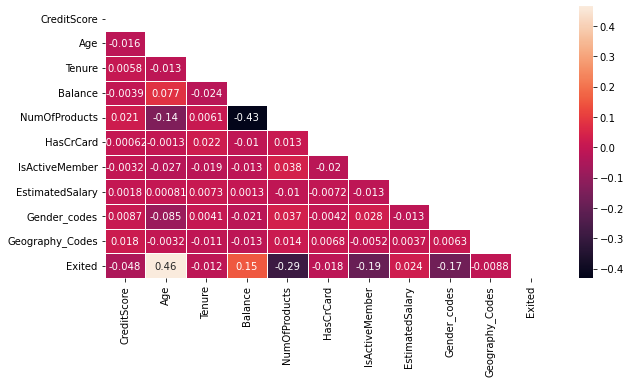

In [30]:
# будуємо матрицю кореляції
plt.figure(figsize=(10, 5))
matrix = np.triu(cor_df.corr())
sns.heatmap(cor_df.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

In [31]:
#виводимо показники кореляції по всім даним
df_cor=cor_df.corr()

df_cor2=pd.DataFrame(
    {
        "Параметр":df_cor.index,
        "Exited":df_cor['Exited']
    }
).groupby('Параметр').first()

df_cor3=df_cor2.loc[df_cor2['Exited'] < 1]

df_cor4=df_cor3.nlargest(10, 'Exited')

df_cor4

,Exited
Параметр,
Age,0.464689
Balance,0.153025
EstimatedSalary,0.023796
Geography_Codes,-0.008796
Tenure,-0.011637
HasCrCard,-0.017616
CreditScore,-0.047703
Gender_codes,-0.173322
IsActiveMember,-0.193615


Спостерігаємо, що кореляція достатньо низька (найбільший показник по модулю 0.46)

Є як пряма, так і зворотня кореляція

З отриманих даних можемо зробити висновок, що на цільовий показник досить суттєво впливають:
- Age
- Balance
- Gender_codes
- IsActiveMember
- NumOfProducts

# 5. Навчаємо модель логістичної регресії

Для подальшої роботи з трейнової, тестової і валідаційної вибірок виключемо колонку `CustomerId`, як нечислову

In [32]:
# Готуємо до прогнозування трейнову, валідаційну і тестову моделі
X_train = train_inputs.drop('id', axis=1)
X_val = val_inputs.drop('id', axis=1)
X_test = test_inputs.drop('id', axis=1)

categorical_cols_2 = 'id'

In [33]:
# інніціюємо
model = LogisticRegression(solver='liblinear')

In [34]:
# тренуємо
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [35]:
train_preds = model.predict(X_train)

In [36]:
train_preds[:20], train_targets[:20]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 7410     0.0
 10894    0.0
 1934     0.0
 11539    0.0
 2952     0.0
 8158     0.0
 7653     0.0
 13114    0.0
 11055    0.0
 7281     1.0
 13206    0.0
 6384     0.0
 13718    0.0
 758      1.0
 8860     0.0
 3312     1.0
 829      1.0
 11347    0.0
 10606    0.0
 13532    0.0
 Name: Exited, dtype: float64)

Перевіримо точність прогнозів моделі, обчисливши відсоток співпадаючих значень у `train_preds` та `train_targets`

In [37]:
print("Train accuracy_score: ", accuracy_score(train_targets, train_preds).round(3))

Train accuracy_score:  0.799


Перевіримо роботу моделі на валідаційних даних

In [38]:
val_preds = model.predict(X_val)
print("Validation accuracy_score: ", accuracy_score(val_targets, val_preds).round(3))

Validation accuracy_score:  0.79


Бачимо, що результати отримали схожі, на 79% модель передбачила цільову змінну

Спробуємо повторити розрахунок, передаючи у Х-вибірки лише максимально корелюючі дані

In [39]:
X_train_2 = X_train[['Age', 'Balance', 'Gender_codes', 'IsActiveMember', 'NumOfProducts']]
X_val_2 = X_val[['Age', 'Balance', 'Gender_codes', 'IsActiveMember', 'NumOfProducts']]

In [40]:
# інніціюємо
model_2 = LogisticRegression(solver='liblinear')
# тренуємо
model_2.fit(X_train_2, train_targets)

LogisticRegression(solver='liblinear')

In [41]:
train_preds_2 = model_2.predict(X_train_2)
print("Train v2 accuracy_score: ", accuracy_score(train_targets, train_preds_2).round(3))

val_preds_2 = model_2.predict(X_val_2)
print("Validation v2 accuracy_score: ", accuracy_score(val_targets, val_preds_2).round(3))

Train v2 accuracy_score:  0.863
Validation v2 accuracy_score:  0.856


**Бачимо, що звуження даних до найбільш корельованих дало гарні результати, ми підвищили точність прогнозу на більш ніж 6% і отримали показник 86%**

Побудуємо матриці невідповідностей для трейнового і валідаційного наборів

In [42]:
def predict_and_plot(inputs, targets, name=''):
    preds = model_2.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 86.28%
Accuracy: 85.63%


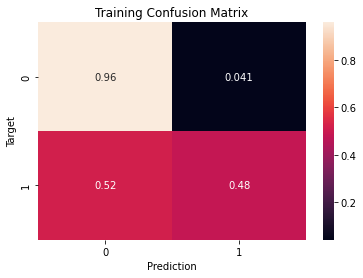

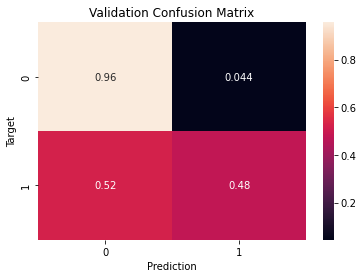

In [43]:
train_preds = predict_and_plot(X_train_2, train_targets, 'Training')
train_preds = predict_and_plot(X_val_2, val_targets, 'Validation')

З матриці невідповідностей бачимо, що різниця в значеннях трейнового і валідаційного наборів є при хибно-позитивному класі 

**Проаналізуємо якість моделі за допомогою F1 score**

In [44]:
# проводимо розрахунки на повному наборі даних
def get_f1_score(inputs, targets, name=''):
  preds = model.predict(inputs)

  f1_score_ = f1_score(targets, preds, pos_label=1)
  print(f"F1 score {name}: {f1_score_:.2f}%")

In [45]:
get_f1_score(X_train, train_targets, 'Training')
get_f1_score(X_val, val_targets, 'Validation')

F1 score Training: 0.00%
F1 score Validation: 0.00%


In [46]:
# проводимо розрахунки на найбільш корелюючому наборі даних
def get_f1_score(inputs, targets, name=''):
  preds = model_2.predict(inputs)

  f1_score_ = f1_score(targets, preds, pos_label=1)
  print(f"F1 score {name}: {f1_score_:.2f}%")

In [47]:
get_f1_score(X_train_2, train_targets, 'Training v2')
get_f1_score(X_val_2, val_targets, 'Validation v2')

F1 score Training v2: 0.59%
F1 score Validation v2: 0.58%


**З отриманих результатів бачимо, що F1 score на повному наборі даних показав 0% це говорить про те, що дана модель дуже погано справляється з прогнозуванням**

**При цьому вибірка найбільш корельованих даних дала показники 0.58, що модель правильно класифікує більше половини даних**

Надалі будемо використовувати `model_2` 

Для відпрацювання тестового набору даних теж будемо використовувати вибірку з найбільш корельованих значень

In [48]:
X_test_fin = X_test[['Age', 'Balance', 'Gender_codes', 'IsActiveMember', 'NumOfProducts']]

In [49]:
numeric_cols_2 = X_train_2.select_dtypes(include=np.number).columns.tolist()

# 6. Зберігаємо найкращу модель і використовуємо її для  передбачення тестового набору даних

In [50]:
Customer = {
    'model': model_2,
    'scaler': scaler,
    'hotenc': hotenc,
    'target_col': target_col,
    'numeric_cols': numeric_cols_2,
    'categorical_cols': categorical_cols_2
}

In [51]:
joblib.dump(Customer, 'Customer.joblib')

['Customer.joblib']

In [52]:
# завантажуємо збережену модель
Customer_2 = joblib.load('Customer.joblib')

In [53]:
test_preds = Customer_2['model'].predict(X_test_fin)
test_preds

array([0., 0., 0., ..., 0., 0., 0.])

**Збираємо тестовий набір і передбачення в один датафрейм**

In [54]:
# Перетворюємо масив в Series
test_preds_df = pd.DataFrame()
test_preds_df = test_preds_df.assign(Exited=test_preds)

# Об'єднуємо DataFrame и Series
Final = pd.concat([test_inputs, test_preds_df], axis=1)

#залишаємо для завантаження на Kaggle лише CustomerId і Exited
Final = Final[['id', 'Exited']]
Final

,id,Exited
0,15000,0.0
1,15001,0.0
2,15002,0.0
3,15003,0.0
4,15004,0.0
...,...,...
9995,24995,0.0
9996,24996,0.0
9997,24997,0.0
9998,24998,0.0


**Візуалізуємо отримані результати**

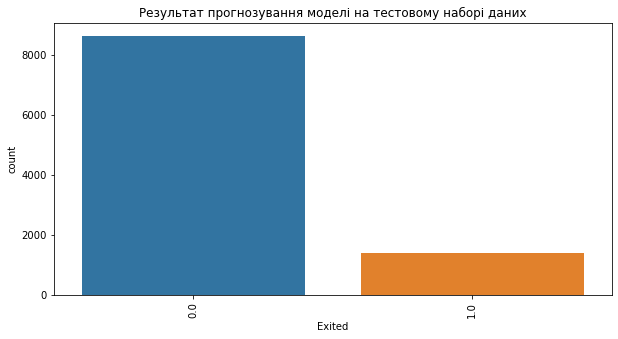

In [55]:
plt.figure(figsize = (10,5))
sns.countplot(data = Final, x = "Exited")
plt.xticks(rotation = 90)
plt.title("Результат прогнозування моделі на тестовому наборі даних")
plt.show()

**Зберігаємо дані у форматі `.csv` для публікації у змаганні**

In [56]:
Final.to_csv('submission.csv', index=False)